# Facial Expression Recognition with Keras


# Import Libraries

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.8.0


In [7]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")


3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


# Generate Training and Validation batches

In [28]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

datagen_test = ImageDataGenerator()
test_generator = datagen_test.flow_from_directory(
        "C:/Users/megha/test/",
        target_size=(48, 48),
        color_mode="grayscale",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)
print(train_generator.class_indices)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


# Creating CNN Model

In [10]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

# Training and Evaluating Model

In [23]:
%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.7820 - accuracy: 0.3163
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 398s 886ms/step - loss: 1.7820 - accuracy: 0.3163 - val_loss: 2.0685 - val_accuracy: 0.3333 - lr: 5.0000e-04
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.4680 - accuracy: 0.4358
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 280s 625ms/step - loss: 1.4680 - accuracy: 0.4358 - val_loss: 1.3264 - val_accuracy: 0.4907 - lr: 5.0000e-04
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.3203 - accuracy: 0.4943
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 285s 636ms/step - loss: 1.3203 - accuracy: 0.4943 - val_loss: 1.3137 - val_accuracy: 0.4814 - lr: 5.0000e-04
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.2403 - accuracy: 0.5278
Epoch 4: saving model to model_wei

In [36]:
from keras.preprocessing import image
import random

2
fear


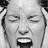

In [37]:
# Predicting the images in the test set
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = np.argmax(model.predict(test_generator,steps = nb_samples),axis=1)

# load all images into a list
folder_path = 'C:/Users/megha/test/'
img_width=48
img_height=48
images = []
for img in filenames:
    img = os.path.join(folder_path, img)
    img = image.load_img(img, color_mode = "grayscale",target_size=(img_width, img_height))
    images.append(img)

# predicting a random image from test set 
n = random.randint(0,len(predict))
print(predict[n])
print(list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(predict[n])])
images[n]

# Representing Model as JSON string

In [31]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)